# 필수 모듈

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations # correlation calculation

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split

# 데이터 불러오기

### 1. csv 데이터를 판다스 데이터 프레임으로 불러오기 

In [2]:
#
train = pd.read_csv('./data3/train.csv')
test = pd.read_csv('./data3/test.csv')
submission = pd.read_csv('./data3/submission.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### 2. 판다스 데이터 프레임의 column 데이터 타입 확인 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### 3. 결측값 확인

In [6]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

- 각 컬럼에서 카운트 되는 결측치 확인

In [7]:

for col_ in list(train.columns):
    nan_count = train[col_].isnull().sum()
    if nan_count != 0:# 결측값이 존재하는 컬럼 출력
        print(f'column : {col_} , nan count :{nan_count} , column data type : {train[col_].dtypes}')


column : LotFrontage , nan count :259 , column data type : float64
column : Alley , nan count :1369 , column data type : object
column : MasVnrType , nan count :872 , column data type : object
column : MasVnrArea , nan count :8 , column data type : float64
column : BsmtQual , nan count :37 , column data type : object
column : BsmtCond , nan count :37 , column data type : object
column : BsmtExposure , nan count :38 , column data type : object
column : BsmtFinType1 , nan count :37 , column data type : object
column : BsmtFinType2 , nan count :38 , column data type : object
column : Electrical , nan count :1 , column data type : object
column : FireplaceQu , nan count :690 , column data type : object
column : GarageType , nan count :81 , column data type : object
column : GarageYrBlt , nan count :81 , column data type : float64
column : GarageFinish , nan count :81 , column data type : object
column : GarageQual , nan count :81 , column data type : object
column : GarageCond , nan count 

### 4. 결측값 처리



### Quiz 1
- 결측치 제거 - dropna()
- 결측치 채우기 - fillna(), interpolate()
- 위의 함수를 이용하여 컬럼 타입이 object가 아닌(float,int) 컬럼들의 결측값을 처리하세요. 

In [8]:
not_object = []
for col_ in list(train.columns):
    nan_count = train[col_].isnull().sum()
    if nan_count != 0:# nan 값이 존재하면
        print(f'column : {col_} , nan count :{nan_count} , column data type : {train[col_].dtypes}')
        if train[col_].dtypes != 'object':
            not_object.append(col_)
print(not_object)


column : LotFrontage , nan count :259 , column data type : float64
column : Alley , nan count :1369 , column data type : object
column : MasVnrType , nan count :872 , column data type : object
column : MasVnrArea , nan count :8 , column data type : float64
column : BsmtQual , nan count :37 , column data type : object
column : BsmtCond , nan count :37 , column data type : object
column : BsmtExposure , nan count :38 , column data type : object
column : BsmtFinType1 , nan count :37 , column data type : object
column : BsmtFinType2 , nan count :38 , column data type : object
column : Electrical , nan count :1 , column data type : object
column : FireplaceQu , nan count :690 , column data type : object
column : GarageType , nan count :81 , column data type : object
column : GarageYrBlt , nan count :81 , column data type : float64
column : GarageFinish , nan count :81 , column data type : object
column : GarageQual , nan count :81 , column data type : object
column : GarageCond , nan count 

In [9]:
#결측치 처리

for nan_object_colum in not_object:
    mean_value = train[nan_object_colum].mean()
    train[nan_object_colum].fillna(mean_value, inplace=True)

print(f'nan값이 존재하던 컬럼에서 컬럼 타입이 object가 아닌 컬럼의 결측치 처리 확인')
for nan_object_colum in not_object:
    print(f'col : {nan_object_colum} , nan_count : {train[nan_object_colum].isnull().sum()}, type {train[nan_object_colum].dtypes}' )
#train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
#train['LotFrontage'].head()

nan값이 존재하던 컬럼에서 컬럼 타입이 object가 아닌 컬럼의 결측치 처리 확인
col : LotFrontage , nan_count : 0, type float64
col : MasVnrArea , nan_count : 0, type float64
col : GarageYrBlt , nan_count : 0, type float64


### Quiz 2


- 컬럼 데이터 타입이 object인 경우에만 결측치를 처리하세요.
- 만약 train 샘플 갯수 1460개//2 한 결과보다 결측치가 많으면 drop()을 이용해 해당 컬럼을 제거하세요.
- 만약 train 샘플 갯수 1460개//2한 결과 보다 결측치가 작으면 결측치를 'missing'으로 처리하세요.

In [10]:
nan_object_col = []

for col_ in list(train.columns):
    nan_count = train[col_].isnull().sum()
    if nan_count != 0:# nan 값이 존재하면
        
        if train[col_].dtypes == 'object' and nan_count > len(train) // 2:
            print(f'column : {col_} , nan count :{nan_count} , column data type : {train[col_].dtypes}')
            nan_object_col.append(col_)
            train.drop(col_, axis=1, inplace=True)
        
        # 컬럼 데이터 타입이 object이면서 결측치가 train 샘플 갯수의 절반보다 작으면 결측치를 'missing'으로 처리
        elif train[col_].dtypes == 'object' and nan_count <= len(train) // 2:
            train[col_].fillna('missing', inplace=True)
            
print(f'제거할 컬럼 : {nan_object_col}') # 제거할 컬럼  

column : Alley , nan count :1369 , column data type : object
column : MasVnrType , nan count :872 , column data type : object
column : PoolQC , nan count :1453 , column data type : object
column : Fence , nan count :1179 , column data type : object
column : MiscFeature , nan count :1406 , column data type : object
제거할 컬럼 : ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


In [11]:
# train = train.drop(nan_object_col, axis = 1)# train의 샘플 갯수의 반보다 결측치가 많으면 제거 확인
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
train['GarageCond'].value_counts() # value_counts는 nana값은 value로 인식하지 않음.

GarageCond
TA         1326
missing      81
Fa           35
Gd            9
Po            7
Ex            2
Name: count, dtype: int64

In [13]:
train['GarageCond'].isnull().sum()

0

In [14]:
train['GarageCond'].shape

(1460,)

In [15]:
train['GarageCond']

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageCond, Length: 1460, dtype: object

### 모든 컬럼의 결측치 처리 확인을 위한 코드입니다.

In [16]:
for col_ in list(train.columns):
    nan_count = train[col_].isnull().sum()

    if nan_count == 0:
    
        print(f'column : {col_} , nan count :{nan_count} , column data type : {train[col_].dtypes}')


column : Id , nan count :0 , column data type : int64
column : MSSubClass , nan count :0 , column data type : int64
column : MSZoning , nan count :0 , column data type : object
column : LotFrontage , nan count :0 , column data type : float64
column : LotArea , nan count :0 , column data type : int64
column : Street , nan count :0 , column data type : object
column : LotShape , nan count :0 , column data type : object
column : LandContour , nan count :0 , column data type : object
column : Utilities , nan count :0 , column data type : object
column : LotConfig , nan count :0 , column data type : object
column : LandSlope , nan count :0 , column data type : object
column : Neighborhood , nan count :0 , column data type : object
column : Condition1 , nan count :0 , column data type : object
column : Condition2 , nan count :0 , column data type : object
column : BldgType , nan count :0 , column data type : object
column : HouseStyle , nan count :0 , column data type : object
column : Overa

## 5. Label encoding

#### 5-1. 수치형 변수와 연속형 변수
- 수치형 변수 : 어떠한 범위 내 수치 값을 갖는 변수
- 범주형 변수 : 성별 변수와 같이 고정된 목록 중 하나의 값을 갖는 변수
#### 5-2. Label encoding
- string 타입으로 구성된 범주형 변수는 모델이 인식할 수 있도록 일련의 변환과정을 거쳐야 합니다. 이 과정을 인코딩이라고 합니다.
- Label encoding은 알파벳 순서에 따라 string 타입으로 구성된 데이터를 unique한 숫자형 타입으로 매핑하는 기법입니다. 


### Quiz 2

- LabelEncoder(), get_dummies() 혹은 !!!!! astype() 등을 이용해서 Label encoding을 수행하세요.

In [17]:
ca_col = train.select_dtypes('object').columns
ca_col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
for i in ca_col:
    train[i] = train[i].astype('category').cat.codes
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,112,0,0,0,0,4,2010,8,4,142125


In [19]:
train['GarageCond'].value_counts()

GarageCond
4    1326
5      81
1      35
2       9
3       7
0       2
Name: count, dtype: int64

In [20]:
#train_2 = train_2.drop(['SaleCondition'], axis = 1)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,112,0,0,0,0,4,2010,8,4,142125


### 6. 타켓 `SalePrice`과 나머지 피처들간의 상관관계 분석
### 6-1. 상관계수
- 연속형 - 연속형 변수 간의 강도를 수치로 표현하는 방법입니다.
- 상관계수는 두 연속형 변수 사이의 연관성 중 직선적인 경향을 나타냅니다.
- 기울기에 상관 없이 산점도가 직선(강한 상관관계)을 이룬다면 +1, -1 값을 가지게 됩니다.
- 상관계수의 절댓값이 0.5인 경우, 두 연속형 변수가 강력한 상관관계가 있다고 통계적으로 지지 받는 수준입니다.

In [21]:
train.corr().round(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000,0.011,-0.006,-0.010,-0.033,0.009,0.032,-0.020,0.013,0.050,...,0.003,-0.047,0.001,0.057,-0.006,0.021,0.001,0.020,-0.006,-0.022
MSSubClass,0.011,1.000,0.036,-0.357,-0.140,-0.025,0.119,-0.003,-0.023,0.076,...,-0.012,-0.044,-0.026,0.008,-0.008,-0.014,-0.021,0.012,-0.025,-0.084
MSZoning,-0.006,0.036,1.000,-0.106,-0.034,0.088,0.062,-0.018,-0.001,-0.010,...,0.116,0.000,0.019,-0.003,0.009,-0.031,-0.021,0.097,0.009,-0.167
LotFrontage,-0.010,-0.357,-0.106,1.000,0.307,-0.037,-0.145,-0.076,-0.000,-0.181,...,0.010,0.062,0.038,0.181,0.001,0.010,0.007,-0.031,0.058,0.335
LotArea,-0.033,-0.140,-0.034,0.307,1.000,-0.197,-0.165,-0.149,0.010,-0.121,...,-0.018,0.020,0.043,0.078,0.038,0.001,-0.014,0.012,0.034,0.264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021,-0.014,-0.031,0.010,0.001,0.004,-0.033,-0.012,-0.052,0.019,...,-0.029,0.029,0.023,-0.034,-0.006,1.000,-0.146,-0.047,0.013,0.046
YrSold,0.001,-0.021,-0.021,0.007,-0.014,-0.025,0.036,0.021,0.023,-0.006,...,-0.010,0.019,0.011,-0.060,0.005,-0.146,1.000,-0.002,0.004,-0.029
SaleType,0.020,0.012,0.097,-0.031,0.012,0.014,-0.001,-0.026,-0.127,0.014,...,-0.017,-0.009,0.005,0.011,0.016,-0.047,-0.002,1.000,0.184,-0.055
SaleCondition,-0.006,-0.025,0.009,0.058,0.034,0.006,-0.038,0.034,-0.090,0.052,...,-0.098,0.004,-0.020,-0.067,0.013,0.013,0.004,0.184,1.000,0.213


In [22]:
train.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
MSZoning        -0.166872
LotFrontage      0.334901
LotArea          0.263843
                   ...   
MoSold           0.046432
YrSold          -0.028923
SaleType        -0.054911
SaleCondition    0.213092
SalePrice        1.000000
Name: SalePrice, Length: 76, dtype: float64

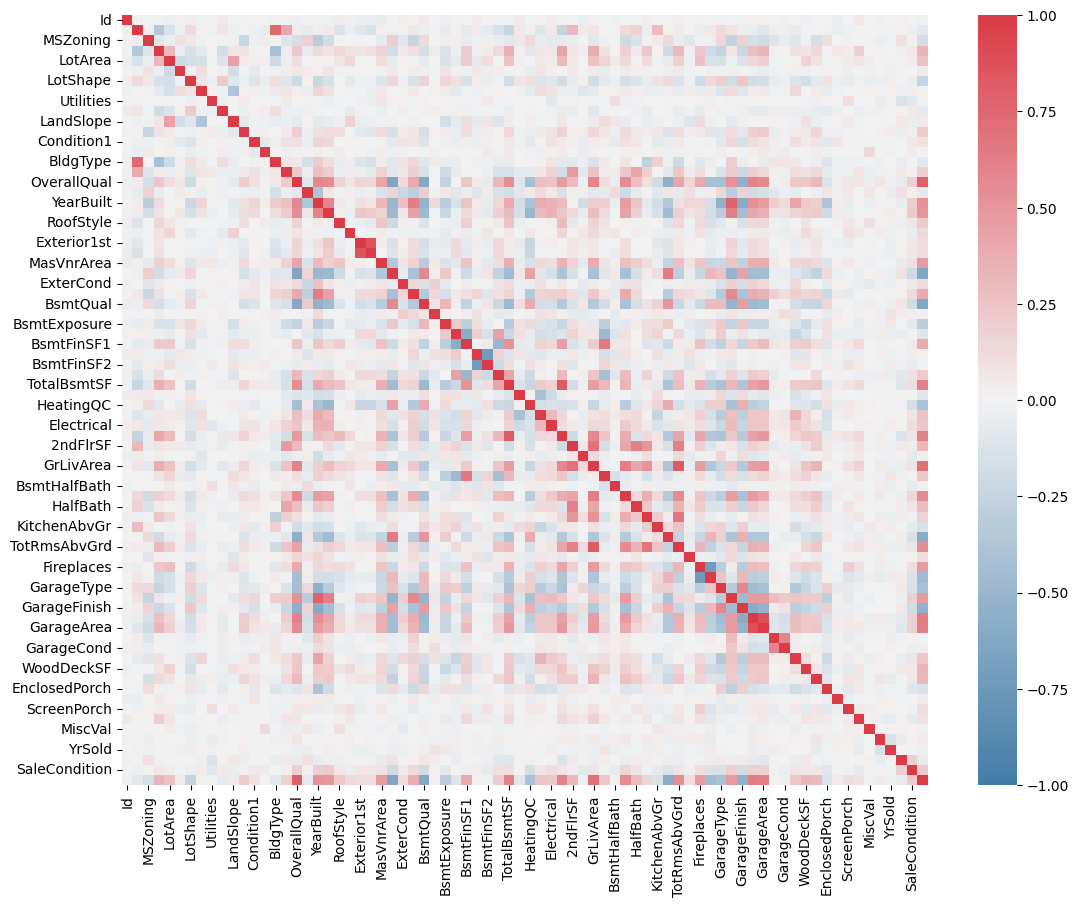

In [23]:
# Code here
plt.figure(figsize=(13, 10))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(train.corr(), cmap=cmap, vmin=-1)
plt.show()

## 7. feature selection
- 우리가 분석해야할 피처는 총 80개 입니다.
- 이 중에서 타켓 `SalePrice` 에 영향을 미치는 피처를 찾기 위한 과정입니다.
- 즉, `SalePrice` 를 예측 하는 것에 영향을 미치는 피처와 미치지 않는 피처를 분리 해야합니다.

### Quiz 3

- SalePrice와의 상관계수의 절댓값이 0.5 이상인 피처를 선택 후 train, test 데이터 프레임을 재생성하세요.
- hint : abs() ,  or 연산을 이용

In [24]:
# SalePrice와의 상관계수 계산
correlation_matrix = train.corr()
saleprice_corr = abs(correlation_matrix['SalePrice'])

# 상관계수가 0.5 이상인 피처 선택
important_num_cols = saleprice_corr[saleprice_corr >= 0.5].index

# important_num_cols 리스트에 저장
important_num_cols = list(important_num_cols)

# train 데이터프레임 재생성
train = train[important_num_cols]


In [25]:
#### saleprice와 important_num_cols 피처간의 상관관계를 출력하는 코드를 작성하세요 #### 
correlation_saleprice = train[important_num_cols].corr()['SalePrice']
print(correlation_saleprice)


OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
ExterQual      -0.636884
BsmtQual       -0.620886
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
KitchenQual    -0.589189
TotRmsAbvGrd    0.533723
GarageFinish   -0.549247
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64


In [26]:
train.shape

(1460, 15)

In [27]:
print("Missing Values by Column")
print("-"*30)
print(train.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",train.isna().sum().sum())

Missing Values by Column
------------------------------
OverallQual     0
YearBuilt       0
YearRemodAdd    0
ExterQual       0
BsmtQual        0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
KitchenQual     0
TotRmsAbvGrd    0
GarageFinish    0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [28]:
train

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageFinish,GarageCars,GarageArea,SalePrice
0,7,2003,2003,2,2,856,856,1710,2,2,8,1,2,548,208500
1,6,1976,1976,3,2,1262,1262,1262,2,3,6,1,2,460,181500
2,7,2001,2002,2,2,920,920,1786,2,2,6,1,2,608,223500
3,7,1915,1970,3,3,756,961,1717,1,2,7,2,3,642,140000
4,8,2000,2000,2,2,1145,1145,2198,2,2,9,1,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,3,2,953,953,1647,2,3,7,1,2,460,175000
1456,6,1978,1988,3,2,1542,2073,2073,2,3,7,2,2,500,210000
1457,7,1941,2006,0,3,1152,1188,2340,2,2,9,1,1,252,266500
1458,5,1950,1996,3,3,1078,1078,1078,1,2,5,2,1,240,142125


### 7-2. 상관관계 시각화

In [29]:
train_corr = train.corr()

<Axes: >

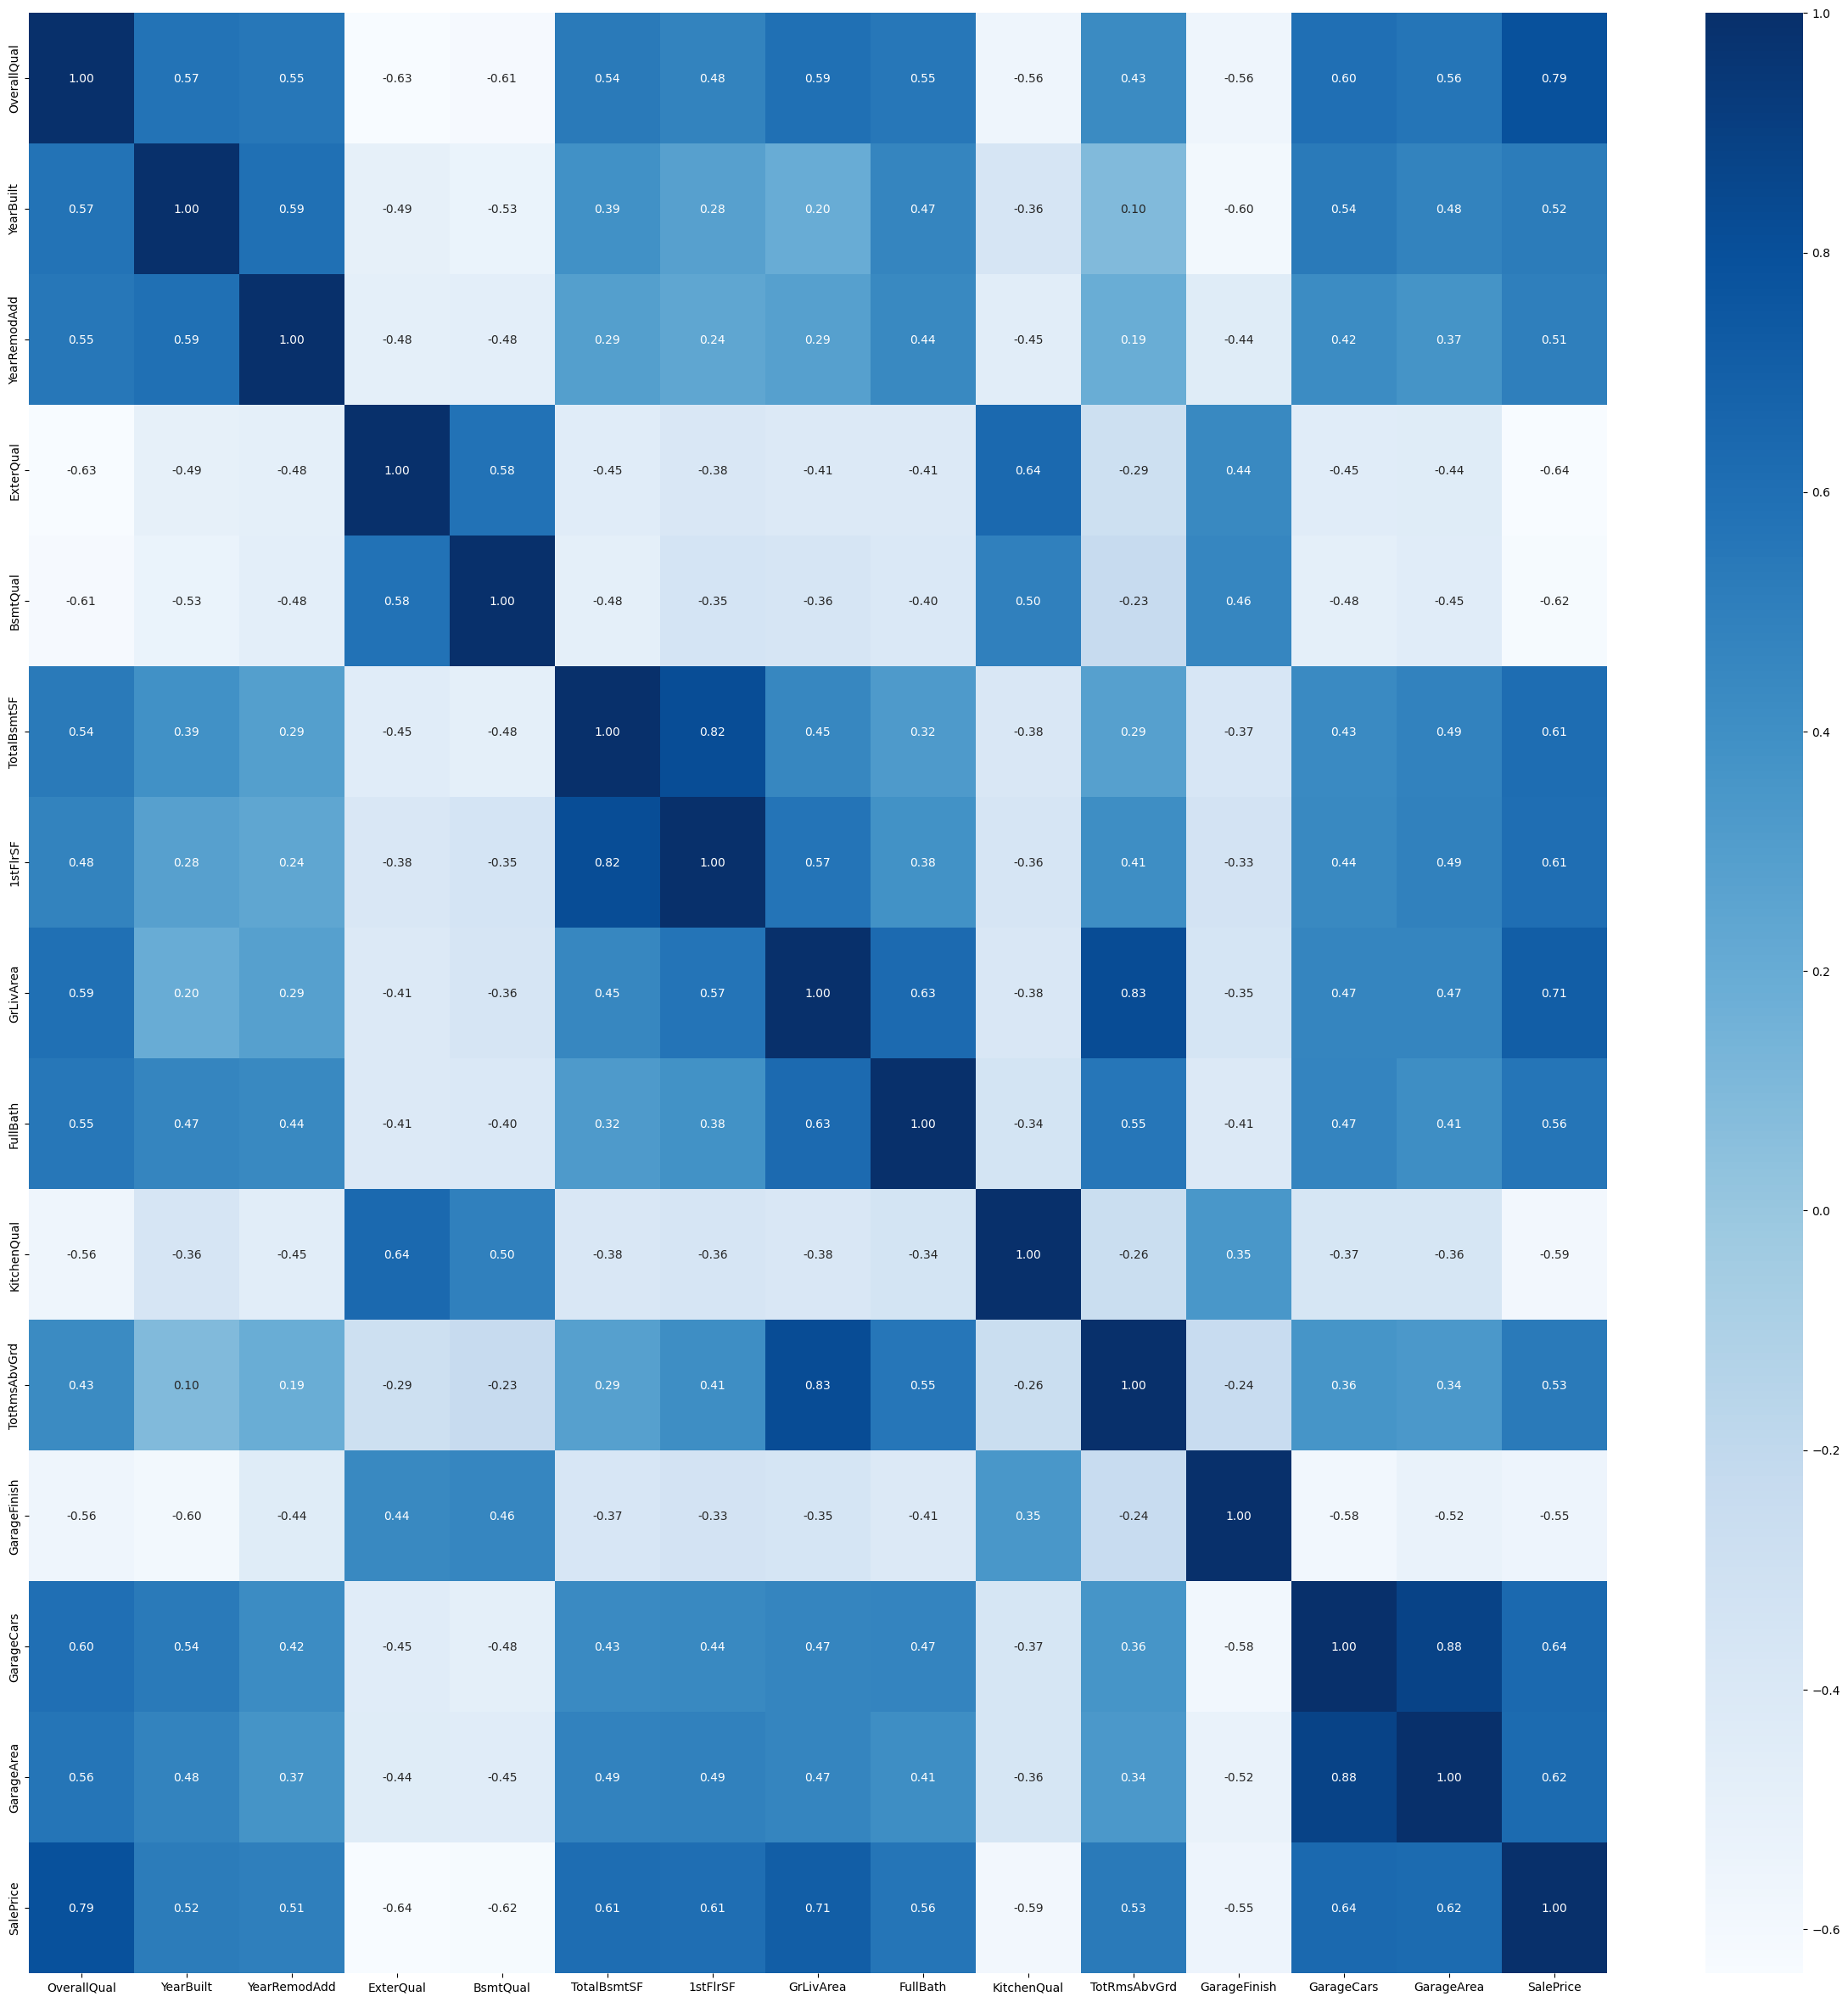

In [30]:
plt.figure(figsize=(30,30))
sns.heatmap(train_corr, annot=True, fmt=".2f", cmap="Blues")

## 모델 학습

### Quiz 4

- 모델을 학습하기 위해 train, test 셋으로 분할하세요.
- 주의! 위의 셀에 있는 X, y로 train, test 셋으로 분할하세요.

In [31]:
X = train
y = train.SalePrice 

In [32]:
### 코드 작성 ##### 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Quiz 5

- MSE loss를 구현하는 함수를 작성하세요. 

In [33]:
def evaluation(real, predict):

    

    # mse = ?  #### 이곳에 구현하세요 #### 
    mse = ((real-predict)**2).mean()
    r_squared = r2_score(real, predict)
    
    return mse, r_squared
    

In [34]:
models = pd.DataFrame(columns=["Model","MSE","R2 Score"])

In [35]:
models

,Model,MSE,R2 Score


### Quiz 6

- LinearRegression 모델을 학습 후 , 모델이 예측한 값의 mse loss 값과 R2 Score값을 출력하세요.

In [36]:
### 코드 작성 #### 
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
mse, r_squared = evaluation(y_test, predictions)

print("MSE:", mse)
print("R2 Score:", r_squared)

new_row = {"Model": "LinearRegression", "MSE": mse,  "R2 Score": r_squared}

models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 9.741241493145025e-22
R2 Score: 1.0


### Quiz 7

- Ridge 모델을 학습 후 , 모델이 예측한 값의 mse loss 값과 R2 Score값을 출력하세요.

In [37]:
### 코드 작성 #### 
ridge1 = Ridge()
ridge1.fit(X_train,y_train)
predictions= ridge1.predict(X_test)
mse, r_squared = evaluation(y_test, predictions)

print("MSE:", mse)
print("R2 Score:", r_squared)

new_row = {"Model": "Ridge", "MSE": mse,  "R2 Score": r_squared}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 6.445101273179719e-16
R2 Score: 1.0


### Quiz 8

- lasso 모델을 학습 후 , 모델이 예측한 값의 mse loss 값과 R2 Score값을 출력하세요.

In [38]:
### 코드 작성 #### 
la1 = Lasso()
la1.fit(X_train,y_train)
predictions= la1.predict(X_test)
mse, r_squared = evaluation(y_test, predictions)

print("MSE:", mse)
print("R2 Score:", r_squared)

new_row = {"Model": "lasso", "MSE": mse, "R2 Score": r_squared}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 0.0018419192270762695
R2 Score: 0.9999999999997599


### Quiz 9

- LinearRegression모델에  PolynomialFeatures()를 이용해 차수를 2로 늘립니다.
- 이 모델을 학습 후 , 모델이 예측한 값의 mse loss 값과 R2 Score값을 출력하세요.

In [39]:
### 코드 작성 #### 

from sklearn.linear_model import LogisticRegression


degree = 2
poly_features = PolynomialFeatures(degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Linear Regression 모델 생성 및 학습
polyreg = LinearRegression()
polyreg.fit(X_train_poly, y_train)

# 모델 예측
predictions = polyreg.predict(X_test_poly)
mse, r_squared = evaluation(y_test, predictions)

print("MSE:", mse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "poly_reg", "MSE": mse, "R2 Score": r_squared}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 5.8896877125829455e-12
R2 Score: 1.0
------------------------------


In [40]:
models

,Model,MSE,R2 Score
0,LinearRegression,9.741241e-22,1.0
1,Ridge,6.445101e-16,1.0
2,lasso,1.841919e-03,1.0
3,poly_reg,5.889688e-12,1.0


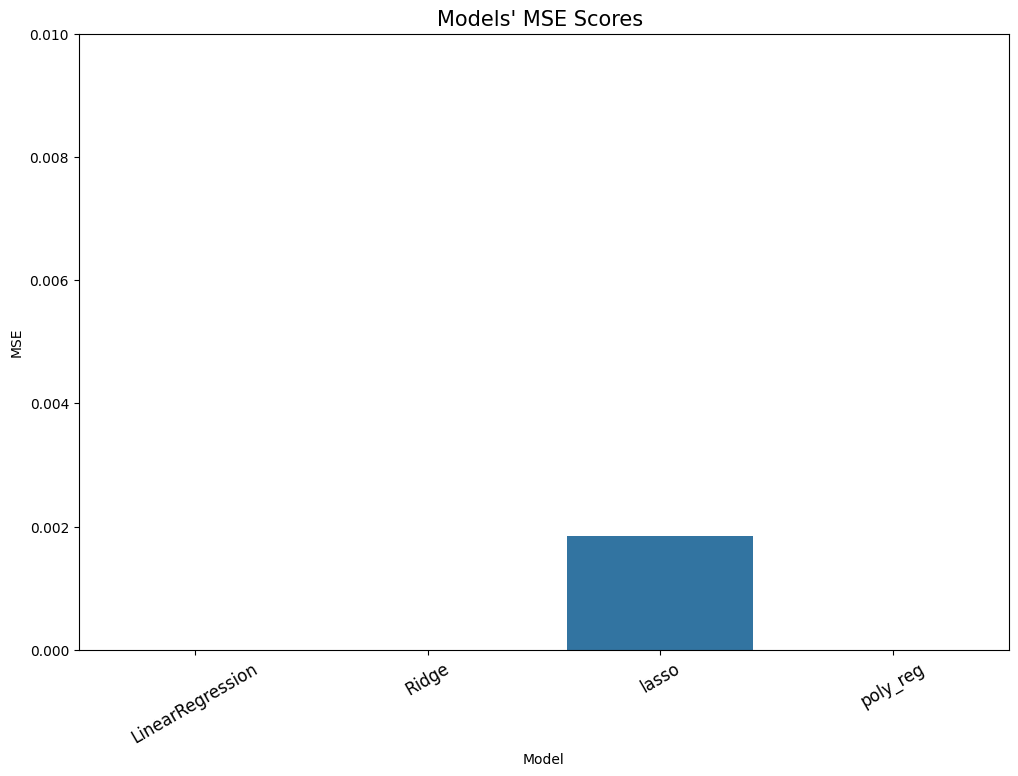

In [41]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["MSE"])
plt.title("Models' MSE Scores ", size=15)
plt.ylim(10**-21, 10**-2)
plt.xticks(rotation=30, size=12)
plt.show()